In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('heart.csv')


<AxesSubplot:>

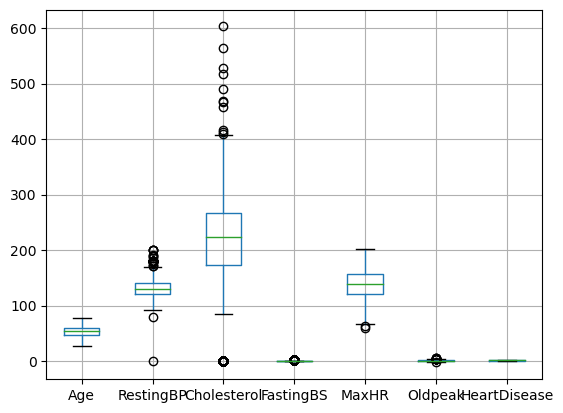

In [3]:
# Check for missing values
data.isnull().sum()

# Check for outliers using boxplot
data.boxplot()


In [4]:
# One-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Label encoding
# data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
# data['ChestPainType'] = data['ChestPainType'].map({'typical angina': 0, 'atypical angina': 1, 'non-anginal pain': 2, 'asymptomatic': 3})
# data['RestingECG'] = data['RestingECG'].map({'normal': 0, 'ST-T wave abnormality': 1, 'left ventricular hypertrophy': 2})
# data['ExerciseAngina'] = data['ExerciseAngina'].map({'no': 0, 'yes': 1})
# data['ST_Slope'] = data['ST_Slope'].map({'upsloping': 0, 'flat': 1, 'downsloping': 2})


In [5]:
X = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Select relevant features
relevant_features = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']



In [18]:
# Create feature vectors
X_train = X_train[:, [1, 2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]
X_test = X_test[:, [1, 2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]]


In [19]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Support Vector Machines
svm = SVC(random_state=42)
svm.fit(X_train, y_train)


SVC(random_state=42)

In [20]:
# Predict using the test set
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluate performance
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Precision:', precision_score(y_test, y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))
print('F1-score:', f1_score(y_test, y_pred_lr))
print('Decision Tree:')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt))
print('Recall:', recall_score(y_test, y_pred_dt))
print('F1-score:', f1_score(y_test, y_pred_dt))
print('Support Vector Machines:')
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Precision:', precision_score(y_test, y_pred_svm))
print('Recall:', recall_score(y_test, y_pred_svm))
print('F1-score:', f1_score(y_test, y_pred_svm))


Logistic Regression:
Accuracy: 0.8260869565217391
Precision: 0.8865979381443299
Recall: 0.8037383177570093
F1-score: 0.8431372549019608
Decision Tree:
Accuracy: 0.7771739130434783
Precision: 0.84375
Recall: 0.7570093457943925
F1-score: 0.7980295566502462
Support Vector Machines:
Accuracy: 0.875
Precision: 0.9038461538461539
Recall: 0.8785046728971962
F1-score: 0.8909952606635071


In [21]:
# Hyperparameter tuning for Decision Tree
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,10)}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)


Best parameters: {'criterion': 'gini', 'max_depth': 5}


In [24]:
# Deploy the model to predict heart disease risk
new_patient = np.array([[1, 100, 1, 120, 180, 1, 500000, 1.1, 140, 0, 1, 0, 0, 0, 1, 0, 0, 1]])
new_patient = scaler.transform(new_patient[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]])

# Predict heart disease risk for new patient using the best model
dt_best = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_best.fit(X_train, y_train)
new_patient_pred = dt_best.predict(new_patient)
print('New patient predicted class:', new_patient_pred)



D:\anaconda 3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 16 features, but StandardScaler is expecting 20 features as input.